# 健保登記診所地圖計畫

http://www.nhi.gov.tw/webdata/webdata.aspx?menu=20&menu_id=712&webdata_id=660&WD_ID=829

In [1]:
# import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('hospbsc.csv',encoding='UTF8')

In [3]:
df.head()


,分局別,醫事機構代碼,醫事機構名稱,機構地址,電話區域號碼,電話號碼,特約類別,型態別,醫事機構種類,終止合約或歇業日期
0,1,0101090019,衛生福利部臺北醫院城區分院,台北市大同區鄭州路４０號,02,25521429,4,01,A,20140217
1,1,0101090517,臺北市立聯合醫院,台北市大同區鄭州路１４５號（代表）,02,25553000,2,01,A,NaN
2,1,0111070010,衛生福利部基隆醫院,基隆市信義區信二路２６８號,02,24292525,2,01,A,NaN
3,1,0131020016,新北市立聯合醫院,新北市三重區新北大道１段３號、板橋區英士路１９８號,02,29829111,2,02,A,NaN
4,1,0131060010,衛生福利部樂生療養院,新北市新莊區中正路７９４號、桃園縣龜山鄉萬壽路１段５０巷２號,02,82006600,3,02,A,NaN


# 特約類別,(level)
"1","醫學中心"
"2","區域醫院"
"3","地區醫院"
"4","診所"
"5","藥局"
"6","居家護理"
"7","康復之家"
"8","助產所"
"9","檢驗所"
"A","物理治療所"
"B","特約醫事放射機構"
"X","不詳"

##業務組別,(area)
"1","臺北業務組"
"2","北區業務組"
"3","中區業務組"
"4","南區業務組"
"5","高屏業務組"
"6","東區業務組"

##機構服務項目代碼,
"0","社區安寧照護"
"1","復健－物理治療業務"
"2","復健－職能治療業務"
"3","復健－聽力語言治療業務"
"4","住院安寧療護"
"5","安寧居家療護"
"6","復健－聽力檢查業務"
"7","復健－語言治療業務"
"8","輸卵管外孕手術"
"A","門診診療"
"B","住院診療"
"C","血液透析"
"D","兒童預防保健"
"E","成人預防保健"
"F","婦女子宮頸抹片檢查"
"G","孕婦產檢"
"H","居家照護"
"I","分娩"
"K","精神病患者居家照護"
"L","精神復健日間型機構"
"M","精神復健住宿型機構"
"N","義肢業務"
"P","兒童牙齒預防保健"
"Q","婦女乳房檢查"
"R","醫事放射業務"
"S","醫事檢驗業務"
"T","婦產科 C 表手術項目"
"U","精神科日間住院治療"
"V","門診藥事服務作業"
"W","腹膜透析業務"
"X","結核病"
"Y","口腔黏膜檢查"
"Z","定量免疫法糞便潛血檢查"

##醫事機構種類(type),醫事機構屬性代碼,醫事機構屬性名稱
"A","01","綜合醫院"
"A","02","醫院"
"A","03","專科醫院"
"A","04","精神科醫院"
"A","06","慢性醫院"
"A","07","專科診所"
"A","08","一般診所（醫務室）"
"A","11","牙醫醫院"
"A","12","牙醫專科診所"
"A","13","牙醫一般診所"
"A","21","中醫縱合醫院"
"A","22","中醫醫院"
"A","23","中醫專科診所"
"A","24","中醫一般診所"
"A","41","捐血中心"
"A","42","捐血站"
"A","43","病理中心"
"B","01","藥師自營"
"B","02","藥劑生自營"
"B","03","藥師駐店管理"
"B","04","藥劑生駐店管理"
"B","05","符合藥事法１０４條規定－藥師管理"
"B","06","符合藥事法１０４條規定－藥劑生管理"
"B","07","中醫師駐店管理"
"B","08","中醫師兼管"
"B","09","藥師兼管"
"B","10","藥劑生兼管"
"B","11","確具中藥基本知識及鑑別能力人員管理"
"B","12","生物藥品製造業技術人員監製"
"B","13","藥師監製"
"B","14","中醫師監製"
"B","15","技術人員監製"
"B","16","其他"
"C","00","其他"
"C","01","一般護理之家"
"C","02","居家護理機構"
"C","03","產後護理機構"
"C","04","助產所"
"C","05","學校醫務室－校護"
"C","06","事業單位醫務室－廠護"
"C","07","社會福利機構"
"C","08","機關醫護室"
"C","09","學校護理教育（實習指導老師）"
"C","11","精神護理之家"
"D","00","其他"
"D","01","醫事檢驗所"
"D","02","醫事放射所"
"D","03","物理治療所"
"D","04","職能治療所"
"D","05","鑲牙所"
"D","06","齒模製造技術員"
"D","07","國術損傷接骨技術員"
"D","4Y","私立居家呼吸照護所"
"E","08","社區復健中心"
"E","09","康復之家"

##診療科別,
診療科別名稱 specialty
"00","不分科"
"01","家醫科"
"02","內科"
"03","外科"
"04","兒科"
"05","婦產科"
"06","骨科"
"07","神經外科"
"08","泌尿科"
"09","耳鼻喉科"
"10","眼科"
"11","皮膚科"
"12","神經科"
"13","精神科"
"14","復健科"
"15","整形外科"
"16","職業醫學科"
"22","急診醫學科"
"2A","結核科"
"2B","洗腎科"
"40","牙科"
"41","復形牙科"
"42","牙髓病科"
"43","牙周病科"
"44","補綴牙科"
"45","齒顎矯正科"
"46","兒童牙科"
"47","口腔顎面外科"
"48","口腔診斷科"
"49","口腔病理科"
"60","中醫科"
"81","麻醉科"
"82","放射線科"
"83","病理科"
"84","核子醫學科"
"85","放射腫瘤科"
"86","放射診斷科"
"87","解剖病理科"
"88","臨床病理科

In [4]:
specialty = pd.read_csv('./data/code_specialty.csv')

In [16]:
df.columns=['area','id','name','address','phone-code', 'phone', 'level', 'code','type','close_date' ]

In [17]:
specialty.specialty

0     00
1     01
2     02
3     03
4     04
5     05
6     06
7     07
8     08
9     09
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    22
18    2A
19    2B
20    40
21    41
22    42
23    43
24    44
25    45
26    46
27    47
28    48
29    49
30    60
31    81
32    82
33    83
34    84
35    85
36    86
37    87
38    88
Name: specialty, dtype: object

In [18]:
df.columns=['area','id','name','address','phone-code', 'phone', 'level', 'code','type','close_date' ]

In [19]:
df

,area,id,name,address,phone-code,phone,level,code,type,close_date
0,1,0101090019,衛生福利部臺北醫院城區分院,台北市大同區鄭州路４０號,02,25521429,4,01,A,20140217
1,1,0101090517,臺北市立聯合醫院,台北市大同區鄭州路１４５號（代表）,02,25553000,2,01,A,NaN
2,1,0111070010,衛生福利部基隆醫院,基隆市信義區信二路２６８號,02,24292525,2,01,A,NaN
3,1,0131020016,新北市立聯合醫院,新北市三重區新北大道１段３號、板橋區英士路１９８號,02,29829111,2,02,A,NaN
4,1,0131060010,衛生福利部樂生療養院,新北市新莊區中正路７９４號、桃園縣龜山鄉萬壽路１段５０巷２號,02,82006600,3,02,A,NaN
5,1,0131060029,衛生福利部臺北醫院,新北市新莊區思源路１２７號,02,22765566,2,01,A,NaN
6,1,0131230012,衛生福利部八里療養院,新北市八里區華富山３３號,02,26101660,2,04,A,NaN
7,1,0190030516,衛生福利部金門醫院,金門縣金湖鎮復興路２號,082,332546,3,01,A,NaN
8,1,0211070012,基隆市立醫院,基隆市信義區東信路２８２號,02,24652141,3,01,A,NaN
9,1,0291010010,連江縣立醫院,連江縣南竿鄉復興村２１７號,083,623995,3,02,A,NaN


Code = "1","醫學中心" "2","區域醫院" "3","地區醫院" "4","診所" "5"

In [20]:
hdf = df[df.level.isin(['1','2','3','4'])]
hdf

,area,id,name,address,phone-code,phone,level,code,type,close_date
0,1,0101090019,衛生福利部臺北醫院城區分院,台北市大同區鄭州路４０號,02,25521429,4,01,A,20140217
1,1,0101090517,臺北市立聯合醫院,台北市大同區鄭州路１４５號（代表）,02,25553000,2,01,A,NaN
2,1,0111070010,衛生福利部基隆醫院,基隆市信義區信二路２６８號,02,24292525,2,01,A,NaN
3,1,0131020016,新北市立聯合醫院,新北市三重區新北大道１段３號、板橋區英士路１９８號,02,29829111,2,02,A,NaN
4,1,0131060010,衛生福利部樂生療養院,新北市新莊區中正路７９４號、桃園縣龜山鄉萬壽路１段５０巷２號,02,82006600,3,02,A,NaN
5,1,0131060029,衛生福利部臺北醫院,新北市新莊區思源路１２７號,02,22765566,2,01,A,NaN
6,1,0131230012,衛生福利部八里療養院,新北市八里區華富山３３號,02,26101660,2,04,A,NaN
7,1,0190030516,衛生福利部金門醫院,金門縣金湖鎮復興路２號,082,332546,3,01,A,NaN
8,1,0211070012,基隆市立醫院,基隆市信義區東信路２８２號,02,24652141,3,01,A,NaN
9,1,0291010010,連江縣立醫院,連江縣南竿鄉復興村２１７號,083,623995,3,02,A,NaN


In [21]:
hdf.level.value_counts()


4    21853
3      392
2       85
1       26
Name: level, dtype: int64

In [22]:
spe = pd.read_csv('./detafunc.txt')

In [26]:
spe.columns = ['id', 'specialty']

In [27]:
spe.specialty.value_counts()

40    6858
60    3568
00    2861
01    1925
02    1872
04    1700
09    1228
05     982
03     882
10     873
06     649
14     633
11     541
13     435
12     290
08     239
81     205
22     163
07     148
15     147
82     121
86      96
83      80
84      69
16      65
47      58
87      50
85      48
45      37
88      19
49      14
2B       5
48       1
Name: specialty, dtype: int64

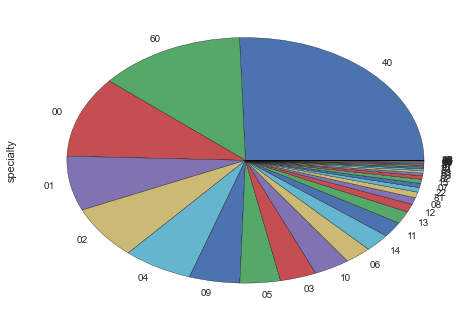

In [28]:
spe.specialty.value_counts().plot(kind='pie')

In [29]:
import seaborn as sbs
import numpy as np

In [30]:
spe['count']=1

In [31]:
spe

,id,specialty,count
0,0101090517,01,1
1,0101090517,02,1
2,0101090517,03,1
3,0101090517,04,1
4,0101090517,05,1
5,0101090517,06,1
6,0101090517,07,1
7,0101090517,08,1
8,0101090517,09,1
9,0101090517,10,1


In [32]:
pv_spe= spe.pivot(index='id',columns='specialty', values='count')

In [33]:
pv_spe

specialty,00,01,02,03,04,05,06,07,08,09,...,49,60,81,82,83,84,85,86,87,88
id,,,,,,,,,,,,,,,,,,,,,
0101090517,NaN,1,1,1,1,1,1,1,1,1,...,NaN,1,1,NaN,NaN,1,1,1,1,1
0102020011,NaN,1,1,1,1,1,1,1,1,1,...,NaN,NaN,1,NaN,NaN,1,1,1,1,NaN
0102070020,NaN,1,1,1,1,1,1,1,1,1,...,NaN,NaN,1,1,1,NaN,1,NaN,NaN,NaN
0102080017,NaN,1,1,1,1,1,1,NaN,1,1,...,NaN,1,1,1,1,NaN,NaN,NaN,NaN,NaN
0102080026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0111070010,NaN,1,1,1,1,1,1,1,1,1,...,NaN,1,1,1,1,NaN,NaN,NaN,NaN,NaN
0117030010,1,1,1,1,1,1,1,1,1,1,...,NaN,1,1,NaN,NaN,1,1,1,1,NaN
0121050011,NaN,1,1,1,1,1,1,1,1,1,...,NaN,1,1,1,1,NaN,NaN,NaN,NaN,NaN
0122020517,NaN,1,1,1,NaN,1,1,NaN,1,NaN,...,NaN,1,1,1,NaN,NaN,NaN,NaN,1,NaN


In [34]:
pv_spe[pv_spe.isnull()] =0

In [35]:
pv_spe.head()

specialty,00,01,02,03,04,05,06,07,08,09,...,49,60,81,82,83,84,85,86,87,88
id,,,,,,,,,,,,,,,,,,,,,
0101090517,0,1,1,1,1,1,1,1,1,1,...,0,1,1,0,0,1,1,1,1,1
0102020011,0,1,1,1,1,1,1,1,1,1,...,0,0,1,0,0,1,1,1,1,0
0102070020,0,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,1,0,0,0
0102080017,0,1,1,1,1,1,1,0,1,1,...,0,1,1,1,1,0,0,0,0,0
0102080026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
pv_spe['86'] = pv_spe['86'] + pv_spe['82']
del pv_spe['82']

In [37]:
pv_spe['83'] = pv_spe['87'] + pv_spe['88']
del pv_spe['87']
del pv_spe['88']

In [38]:
pv_spe.iloc[40]

specialty
00    0
01    0
02    0
03    1
04    1
05    0
06    0
07    0
08    0
09    0
10    0
11    0
12    0
13    1
14    1
15    0
16    0
22    0
2B    0
40    1
45    0
47    0
48    0
49    0
60    0
81    1
83    0
84    0
85    0
86    1
Name: 0401180023, dtype: float64

/Users/falcon0125/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


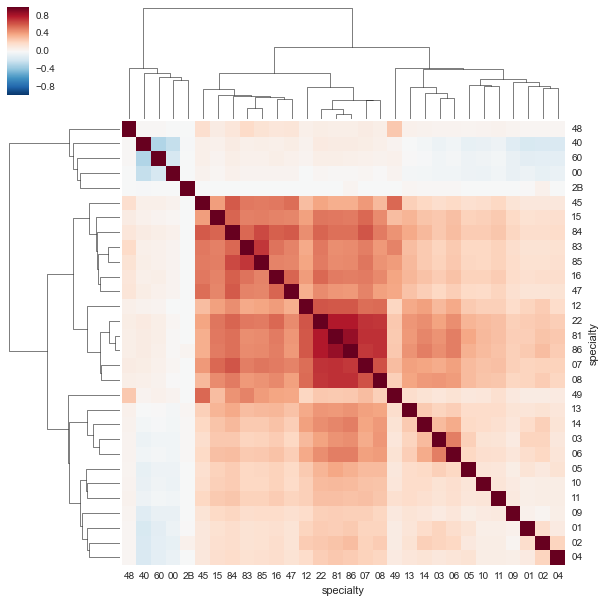

In [39]:
sbs.clustermap(pv_spe.corr())

In [40]:
specialty_dist = spe.specialty.value_counts()

In [41]:
specialty.index=specialty.specialty

In [42]:
del specialty['specialty']

In [43]:
result = specialty.join(specialty_dist)

In [44]:
result

,chinese_name,specialty
specialty,,
00,不分科,2861
01,家醫科,1925
02,內科,1872
03,外科,882
04,兒科,1700
05,婦產科,982
06,骨科,649
07,神經外科,148
08,泌尿科,239


In [45]:
result.sort('specialty',ascending=False)

/Users/falcon0125/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,chinese_name,specialty
specialty,,
40,牙科,6858
60,中醫科,3568
00,不分科,2861
01,家醫科,1925
02,內科,1872
04,兒科,1700
09,耳鼻喉科,1228
05,婦產科,982
03,外科,882


In [47]:
import geocoder

In [48]:
g = geocoder.google(u'宜蘭縣蘇澳鎮蘇濱路')

In [49]:
g.latlng

[24.6151605, 121.8488582]

In [50]:
f = lambda x : geocoder.google(x)

In [51]:
f(u'台北市大同區鄭州路（代表）')

<[OK] Google - Geocode [Zhengzhou Rd, Datong District, Taipei City, Taiwan 103]>

In [52]:
address1 = df.address.to_dict()

In [53]:
g = geocoder.google(address1[32])

In [54]:
g

<[OK] Google - Geocode [No. 77, Section 4, Zhongxiao E Rd, Da’an District, Taipei City, Taiwan 106]>

In [55]:
result = []

In [56]:
for key, value in address1.items():
    g = geocoder.google(value)
    result.append((key, g.status_code, g.confidence, g.latlng, value))
    print key, g.status_code, g.confidence, g.latlng, value
    

0 200 9 [25.0502095, 121.5085146] 台北市大同區鄭州路４０號
1 200 9 [25.0509696, 121.5093209] 台北市大同區鄭州路１４５號（代表）
2 200 9 [25.1302624, 121.7481291] 基隆市信義區信二路２６８號
3 200 9 [25.0617081, 121.4912341] 新北市三重區新北大道１段３號、板橋區英士路１９８號
4 200 0 [] 新北市新莊區中正路７９４號、桃園縣龜山鄉萬壽路１段５０巷２號
5 200 9 [25.0429644, 121.4595886] 新北市新莊區思源路１２７號
6 200 7 [25.1395326, 121.4182384] 新北市八里區華富山３３號
7 200 9 [24.4406944, 118.4200874] 金門縣金湖鎮復興路２號
8 200 9 [25.1296063, 121.7619835] 基隆市信義區東信路２８２號
9 200 7 [26.1645594, 119.9581538] 連江縣南竿鄉復興村２１７號
10 200 9 [25.040743, 121.5181666] 台北市中正區中山南路７、８號；常德街１號
11 200 9 [25.0442304, 121.5188189] 台北市中正區中山南路８號
12 200 9 [25.0421358, 121.5024897] 台北市萬華區康定路３７號、台北市萬華區內江街８７號
13 200 7 [25.22508, 121.638625] 新北市金山區五湖里玉爐路７號
14 200 9 [24.7577719, 121.754158] 宜蘭縣宜蘭市新民路１５２號
15 200 9 [25.054373, 121.557672] 台北市松山區健康路１３１號
16 200 9 [25.0712818, 121.5910458] 台北市內湖區成功路２段３２５號
17 200 9 [25.1395917, 121.5097658] 台北市北投區新民路６０號　中和街２５０號
18 200 9 [25.1288518, 121.7394966] 基隆市中正區正榮街１００號，仁愛區孝二路３９號
19 200 9 [25.1192105, 121.5203822] 台北市北投區石

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [ ]:
import sys

In [ ]:
sys.maxsize